In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Sample9.csv")
df

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,165548,604039696,G,15.5500,-0.6422,-14.3635,-5.9219,14.3779,-0.4010,-1.6155,...,T,3.5116,-1.0242,-0.7346,3.2759,1.2604,1.6834,-2.5194,-1,11.2077
99996,165548,604109784,G,29.0521,-2.5229,4.8188,-28.5381,5.4393,-2.3597,2.0531,...,G,9.8427,3.8924,-5.0569,-7.4929,6.3815,-0.9993,-0.9148,-1,14.5819
99997,165548,604123712,G,11.3198,-0.3840,8.7650,-7.1523,8.7734,-0.7445,1.6146,...,G,19.8499,-0.8391,-17.3203,9.6597,17.3406,0.5317,-1.6192,1,29.8425
99998,165548,604295320,G,8.7502,5.9613,1.0398,-6.3195,6.0513,-0.9124,0.1727,...,G,11.8601,-6.2436,0.4801,10.0717,6.2620,1.2534,3.0648,-1,20.2068


In [84]:
# Discriminamos de acurdo a si tienen la misma carga o si alguno de los muones es Track muon. 
df = df[(df["Q1"] != df["Q2"]) & (df["type1"] != "T") & (df["type2"] != "T")].reset_index().drop(columns="index")
df

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93469,165548,603888744,G,11.7225,3.5792,5.3506,9.7963,6.4373,1.2068,0.9812,...,G,18.8728,-6.0500,-12.4784,12.8007,13.8677,0.8259,-2.0222,1,19.1974
93470,165548,604006648,G,4.5997,-2.1350,-3.4266,2.2015,4.0373,0.5213,-2.1280,...,G,5.0090,2.5057,3.5789,2.4479,4.3688,0.5345,0.9600,1,8.3994
93471,165548,604109784,G,29.0521,-2.5229,4.8188,-28.5381,5.4393,-2.3597,2.0531,...,G,9.8427,3.8924,-5.0569,-7.4929,6.3815,-0.9993,-0.9148,-1,14.5819
93472,165548,604123712,G,11.3198,-0.3840,8.7650,-7.1523,8.7734,-0.7445,1.6146,...,G,19.8499,-0.8391,-17.3203,9.6597,17.3406,0.5317,-1.6192,1,29.8425


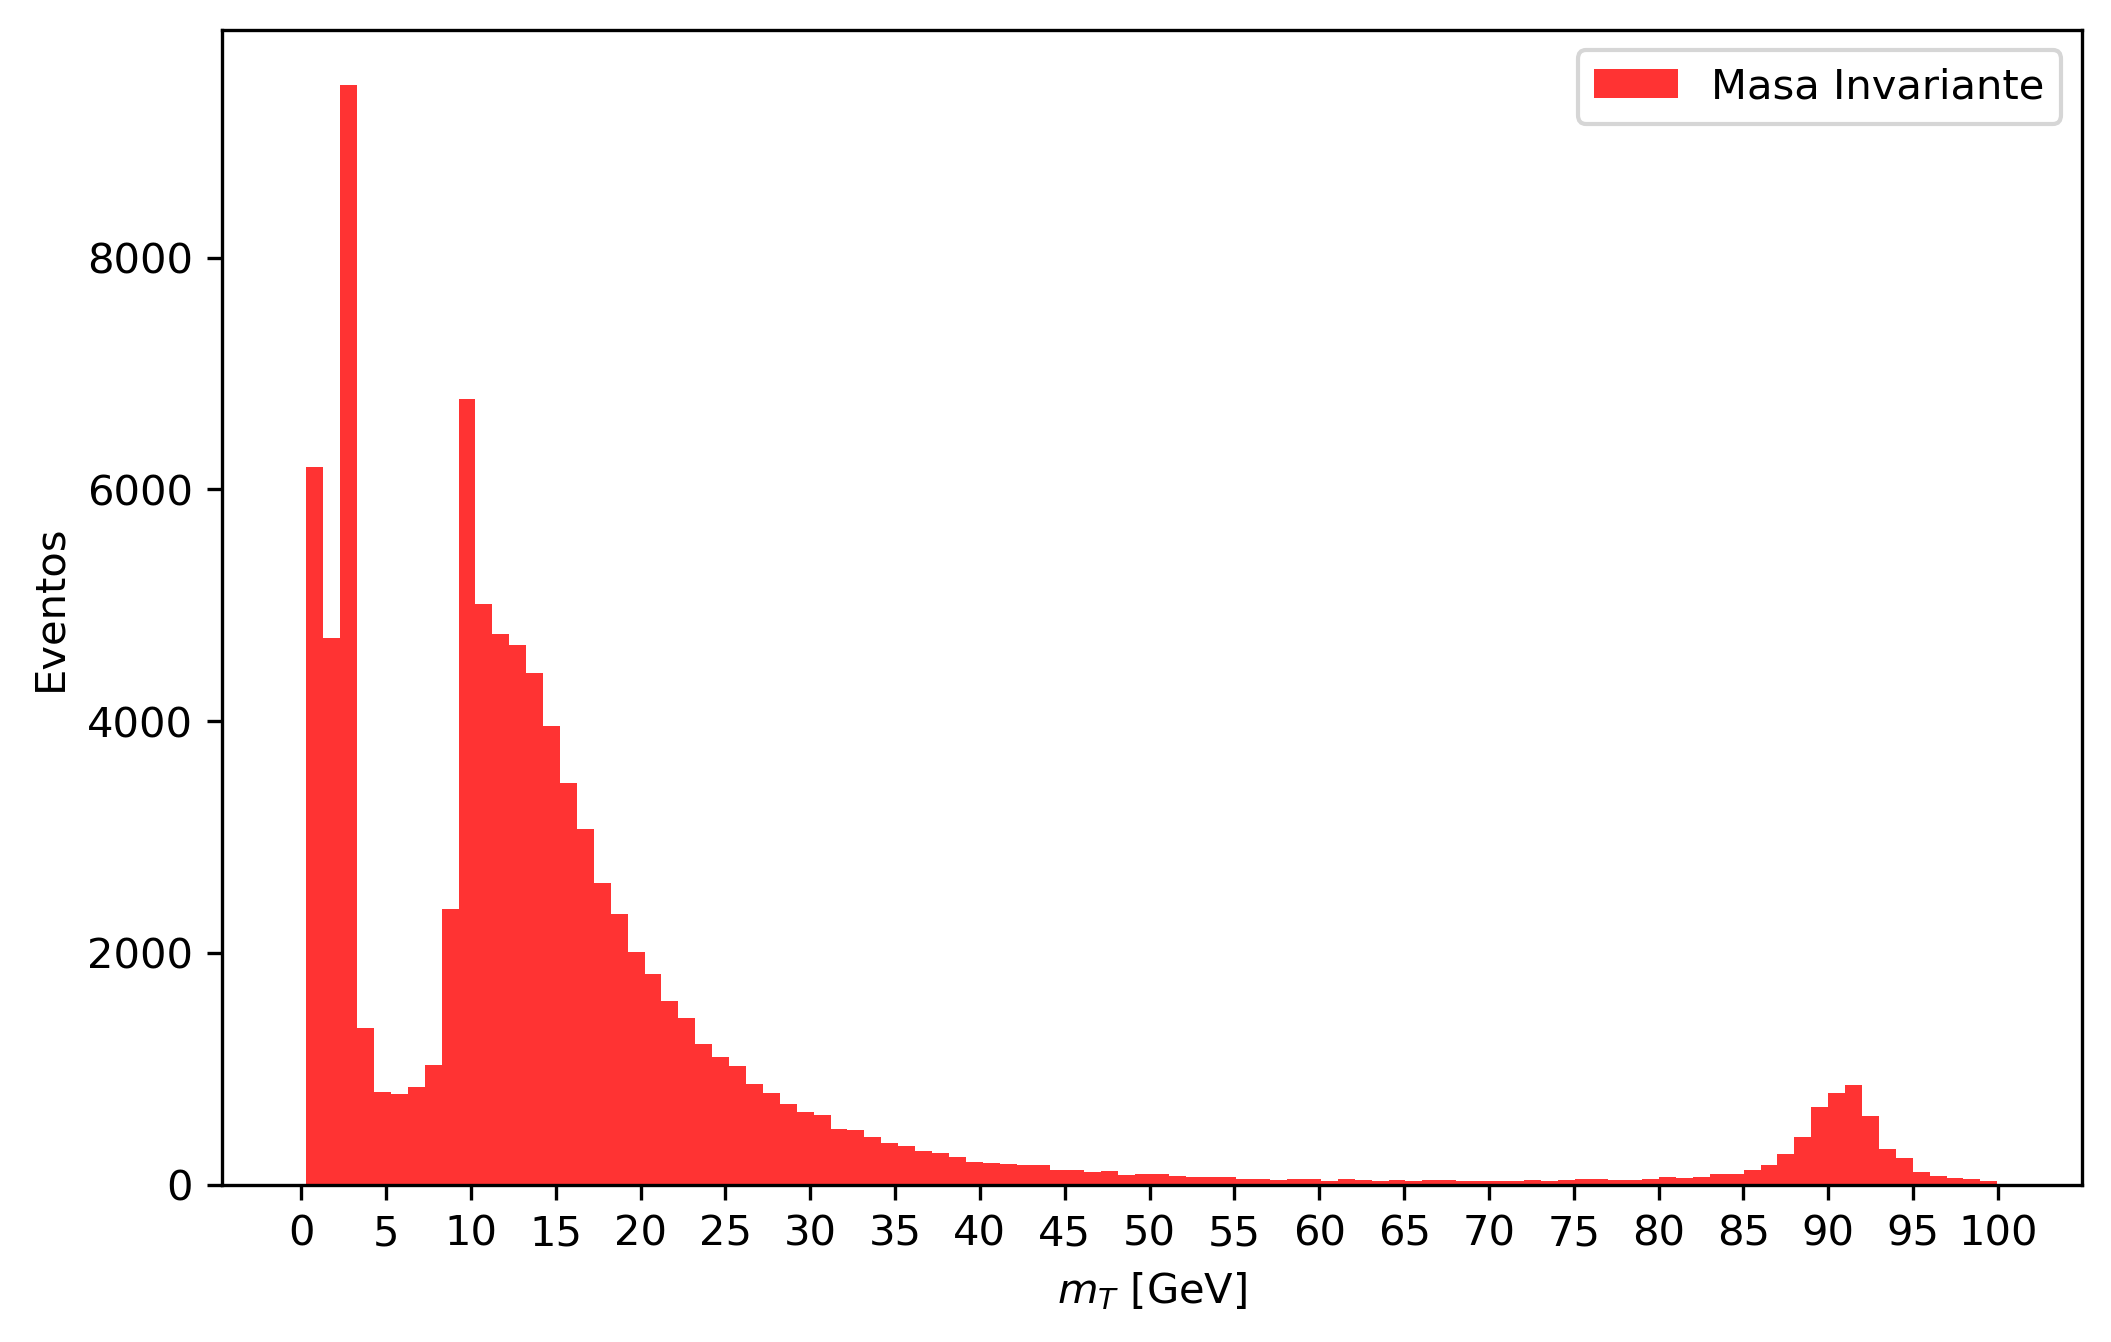

In [82]:
plt.figure(figsize=(8, 5), dpi=300)
n, bins, patches = plt.hist(df["M"][df["M"] < 100], bins=100, alpha=0.8, color="r", label="Masa Invariante")
plt.xlabel("$m_T$ [GeV]")
plt.ylabel("Eventos")
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
plt.savefig("hist_mmdist", bbox_inches="tight")
plt.show()

In [130]:
n

array([6193., 4716., 9494., 1353.,  795.,  779.,  841., 1029., 2382.,
       6778., 5014., 4749., 4660., 4416., 3957., 3469., 3065., 2604.,
       2334., 2003., 1820., 1584., 1434., 1217., 1105., 1025.,  866.,
        792.,  693.,  623.,  598.,  480.,  474.,  407.,  360.,  332.,
        289.,  274.,  238.,  198.,  182.,  180.,  165.,  169.,  124.,
        124.,  112.,  116.,   80.,   90.,   88.,   73.,   68.,   62.,
         65.,   44.,   48.,   41.,   48.,   50.,   34.,   44.,   38.,
         27.,   39.,   32.,   37.,   39.,   31.,   30.,   33.,   32.,
         39.,   30.,   38.,   50.,   44.,   38.,   39.,   46.,   64.,
         58.,   68.,   90.,   95.,  125.,  167.,  261.,  412.,  666.,
        792.,  860.,  588.,  308.,  231.,  106.,   77.,   54.,   45.,
         32.])

In [138]:
bins[91]

90.99371199999999

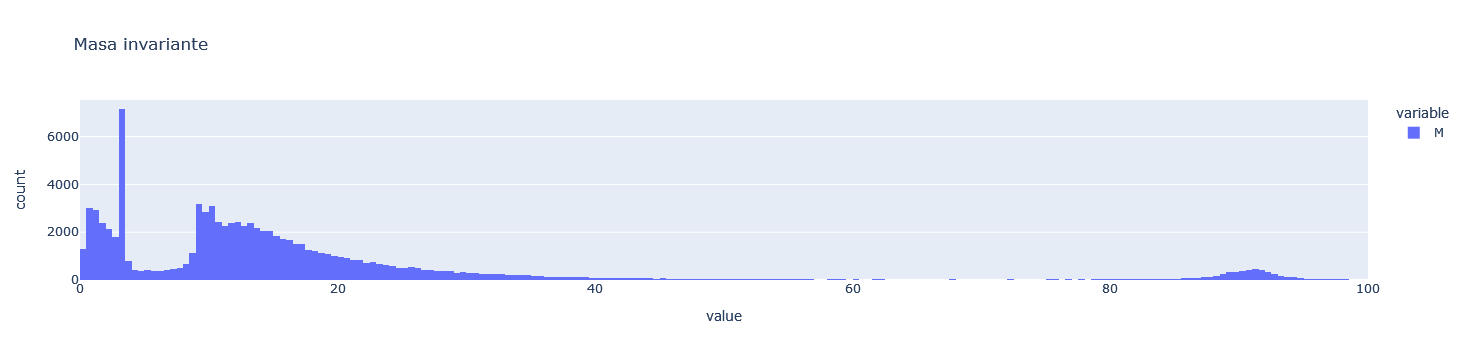

In [124]:
import plotly.express as px

fig_5=px.histogram(df["M"][df["M"] < 100], title="Masa invariante")
fig_5.show()

In [110]:
def minv(pt1,pt2,eta1,eta2,phi1,phi2):
  return np.sqrt(2*pt1*pt2*(np.cosh(eta2-eta1)-np.cos(phi1-phi2)))

def ptransv(px, py):
    return np.sqrt(px**2 + py**2)

minv = minv(df['pt1'], df['pt2'], df['eta1'], df['eta2'], df['phi1'], df['phi2'])
minv

0        17.491141
1        11.551450
2         9.160949
3        12.475563
4        14.314328
           ...    
93469    19.196073
93470     8.396729
93471    14.580022
93472    29.841969
93473    20.205780
Length: 93474, dtype: float64

In [62]:
sum(df["M"]-minv)/len(minv)

0.01397727987112329

In [112]:
pt1 = ptransv(df["px1"], df["py1"])
pt2 = ptransv(df["px2"], df["py2"])

stdv1 = sum(df["pt1"] - pt1)/len(pt1)
stdv2 = sum(df["pt2"] - pt2)/len(pt2)

print(f"""
La diff. promedio del pt1 es: {stdv1}
La diff. promedio del pt2 es: {stdv2}
""")


La diff. promedio del pt1 es: -0.05981099152941561
La diff. promedio del pt2 es: -0.009343647799536812



In [116]:
(len(pt1)/100000)*100

93.474